In [3]:
import pandas as pd
import numpy as np
cars_data=pd.read_csv("cars.csv",header=None)
cars_data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
cars_data.shape

(1728, 7)

In [5]:
cars_data.columns=['buying','maint','doors','persons','lug_boot','safety','classes']

In [6]:
cars_data.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
cars_data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

In [8]:
cars_df=pd.DataFrame.copy(cars_data)
cars_df
colname=cars_df.columns
colname

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'classes'], dtype='object')

In [9]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    cars_df[x]=le.fit_transform(cars_df[x])

In [10]:
cars_df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [11]:
cars_data.classes.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: classes, dtype: int64

In [12]:
x=cars_df.values[:,0:-1]
y=cars_df.values[:,-1]
y=y.astype(int)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(x)
x=scaler.transform(x)

In [14]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [15]:
#Running Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [16]:
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion MAtrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[101   0   1   0]
 [  2  19   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]
0.9922928709055877
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.99       519
   macro avg       0.99      0.96      0.98       519
weighted avg       0.99      0.99      0.99       519



In [18]:
print(list(zip(colname,model_DecisionTree.feature_importances_)))

[('buying', 0.1510848831946676), ('maint', 0.2506508516803624), ('doors', 0.060026331736828115), ('persons', 0.19355707150872045), ('lug_boot', 0.09892620952419463), ('safety', 0.2457546523552268)]


In [19]:
from sklearn import tree
with open("model_DecisionTree.txt", "w") as f:
    f = tree.export_graphviz(model_DecisionTree, feature_names=colname[:-1],out_file=f)

#generate the file and upload the code in webgraphviz.com to plot the decision tree

In [20]:
from sklearn import svm
classifier=svm.SVC(kernel="rbf", gamma=0.1,C=1)
#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 82   0  20   0]
 [ 21   0   0   0]
 [ 17   0 354   0]
 [ 17   0   0   8]]
0.8554913294797688
              precision    recall  f1-score   support

           0       0.60      0.80      0.69       102
           1       0.00      0.00      0.00        21
           2       0.95      0.95      0.95       371
           3       1.00      0.32      0.48        25

    accuracy                           0.86       519
   macro avg       0.64      0.52      0.53       519
weighted avg       0.84      0.86      0.84       519



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn.linear_model import LogisticRegression

#crate a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 22   0  80   0]
 [  3   0  18   0]
 [ 30   0 341   0]
 [ 11   0  14   0]]
0.6994219653179191
              precision    recall  f1-score   support

           0       0.33      0.22      0.26       102
           1       0.00      0.00      0.00        21
           2       0.75      0.92      0.83       371
           3       0.00      0.00      0.00        25

    accuracy                           0.70       519
   macro avg       0.27      0.28      0.27       519
weighted avg       0.60      0.70      0.64       519



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(100,random_state=10)
model_RandomForest.fit(X_train,Y_train)
Y_pred=model_RandomForest.predict(X_test)

In [25]:
from sklearn.ensemble import AdaBoostClassifier
model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,random_state=10)

model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 99   2   1   0]
 [  4  17   0   0]
 [  0   0 371   0]
 [  1   0   0  24]]
0.9845857418111753
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       102
           1       0.89      0.81      0.85        21
           2       1.00      1.00      1.00       371
           3       1.00      0.96      0.98        25

    accuracy                           0.98       519
   macro avg       0.96      0.94      0.95       519
weighted avg       0.98      0.98      0.98       519



In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,random_state=10)

model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[101   1   0   0]
 [  0  19   0   2]
 [  0   1 370   0]
 [  0   0   0  25]]
0.9922928709055877
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.90      0.90      0.90        21
           2       1.00      1.00      1.00       371
           3       0.93      1.00      0.96        25

    accuracy                           0.99       519
   macro avg       0.96      0.97      0.97       519
weighted avg       0.99      0.99      0.99       519



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# create the sub models
estimators = []
#model1 = LogisticRegression()
#estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion='gini',random_state=10)
estimators.append(('cart', model2))
model3 = SVC(kernel="rbf", C=70,gamma=0.1)
estimators.append(('svm', model3))
#model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
#estimators.append(('knn', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[2 2 2 2 1 2 0 0 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2
 2 2 0 2 2 2 3 2 0 2 2 2 2 2 0 1 3 1 2 0 2 0 2 2 2 2 3 2 2 0 0 2 2 3 2 2 2
 1 2 0 0 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 0 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 3 2 2 0 2 0 3 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 1 1 2 0 2 2 2 2 2 2 2 2 2 1 2 3 2 2 2 2 0 0 2 2 2 2 3
 2 0 2 1 0 2 2 2 2 0 3 0 0 2 2 2 2 0 2 2 2 2 2 2 2 3 0 2 2 2 3 2 2 1 2 2 2
 2 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 3 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 2 2 0
 2 2 2 0 2 2 2 0 2 2 0 2 2 2 1 1 2 2 2 0 0 2 0 3 3 0 2 0 2 2 2 3 2 2 0 2 2
 2 2 2 0 2 2 2 3 2 2 2 0 2 2 2 2 0 0 2 2 1 2 2 2 0 2 2 0 0 2 0 0 2 2 0 0 2
 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 1 3 3 2 2 2 2 0 2 2 2 3 2 2 0 2 1 2 2 2
 0 0 2 2 2 2 2 2 2 0 2 0 1 2 2 2 2 2 0 2 2 3 0 0 0 0 2 0 2 2 2 0 0 2 0 2 1
 0 2 2 0 2 2 2 0 1 2 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 3 2 2 2 2 0 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0 3 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 

In [47]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
df=pd.read_csv(r'AirLinePassengers_data.csv')
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [48]:
df.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [49]:
df.Timestamp=pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
df.index=df.Timestamp
df=df.resample('D').sum()

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [50]:
df.head()

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60


In [51]:
df.tail()

,ID,Count
Datetime,,
2013-12-27,281940,3868
2013-12-28,282516,3084
2013-12-29,283092,2330
2013-12-30,283668,4928
2013-12-31,284244,4860


In [52]:
df.sort_index(axis=0)

,ID,Count
Datetime,,
2012-08-25,276,76
2012-08-26,852,88
2012-08-27,1428,62
2012-08-28,2004,58
2012-08-29,2580,60
2012-08-30,3156,74
2012-08-31,3732,78
2012-09-01,4308,112
2012-09-02,4884,118


In [54]:
train=df.loc[:'2013-10-31']
train.tail()

,ID,Count
Datetime,,
2013-10-27,246804,2082
2013-10-28,247380,3536
2013-10-29,247956,4030
2013-10-30,248532,3774
2013-10-31,249108,3408


In [55]:
test=df.loc['2013-11-01':]
test.tail()

,ID,Count
Datetime,,
2013-12-27,281940,3868
2013-12-28,282516,3084
2013-12-29,283092,2330
2013-12-30,283668,4928
2013-12-31,284244,4860


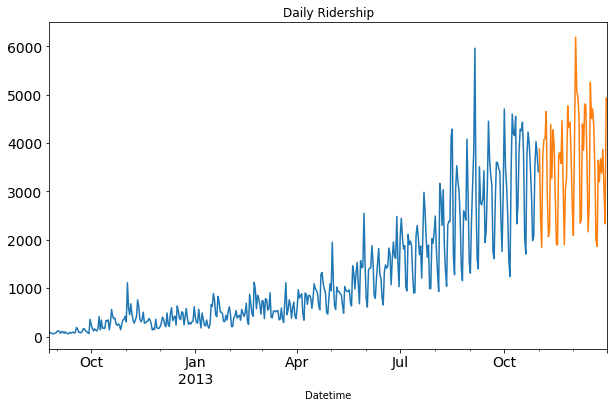

In [56]:
#plotting data
train.Count.plot(figsize=(10,6),title='Daily Ridership',fontsize=14)
test.Count.plot(figsize=(10,6),title='Daily Ridership',fontsize=14)
plt.show()

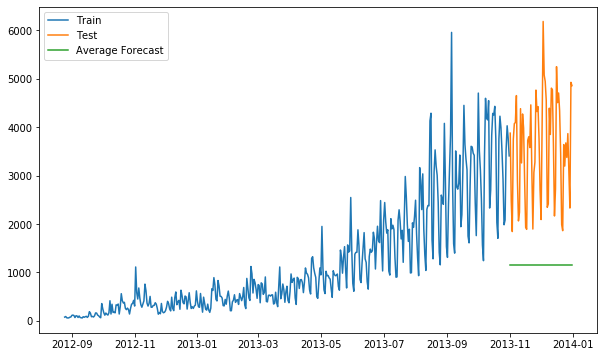

In [57]:
y_hat_avg=test.copy()
y_hat_avg['avg_forecast']=train['Count'].mean()

plt.figure(figsize=(10,6))
plt.plot(train['Count'],label='Train')
plt.plot(test['Count'],label='Test')
plt.plot(y_hat_avg['avg_forecast'],label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [58]:
train['Count'].mean()

1160.0092378752886

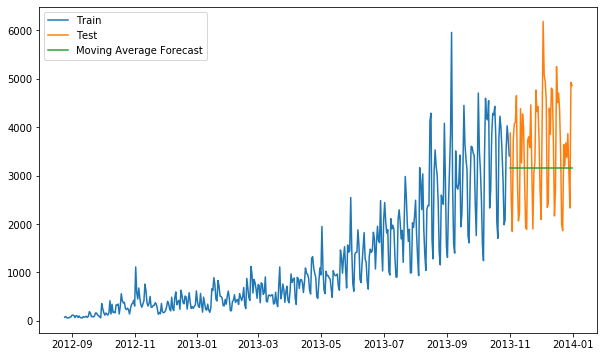

In [59]:
y_hat_avg=test.copy()
y_hat_avg['moving_avg_forecast']=train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(10,6))
plt.plot(train['Count'],label='Train')
plt.plot(test['Count'],label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat_avg.Count,y_hat_avg.moving_avg_forecast))
print(rms)

1121.4817740256713


In [65]:
train=train.astype('double')

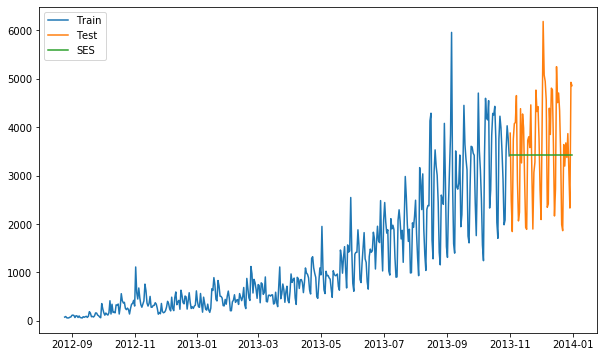

In [66]:
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat_avg=test.copy()
#print(y_hat_avg)
fit2=SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.3)
y_hat_avg['SES']=fit2.forecast(len(test))
plt.figure(figsize=(10,6))
plt.plot(train['Count'],label='Train')
plt.plot(test['Count'],label='Test')
plt.plot(y_hat_avg['SES'],label='SES')
plt.legend(loc='best')
plt.show()

In [68]:
fit2.aic

5463.495843743926

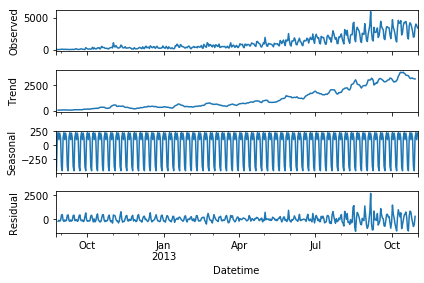

In [71]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
plt.show()

KeyError: 'Holt_linear'

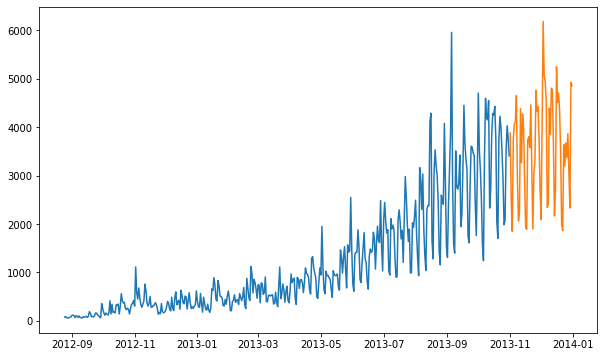

In [75]:
from statsmodels.tsa.api import Holt
y_hat_avg=test.copy()

fit1=Holt(np.asarray(train['Count'])).fit(smoothing_level=0.23,smoothing_slope=0.2)
y_hat_avg['Hot_linear']=fit1.forecast(len(test))

plt.figure(figsize=(10,6))
plt.plot(train['Count'],label='Train')
plt.plot(test['Count'],label='Test')
plt.plot(y_hat_avg['Holt_linear'],label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [78]:
fit1.aic

5512.143121788287

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_hat_avg.Count,y_hat_avg.Holt_linear))
print(rms)

AttributeError: 'DataFrame' object has no attribute 'Holt_linear'

In [81]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg=test.copy()
fit1=ExponentialSmoothing(np.asarray(train['Count']),seasonal_periods=7,trend='add')

In [ ]:
from sklearn.metrics import